In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def imshow(image):
    cv.imshow('image', image)
    cv.waitKey(0) 
    cv.destroyWindow('image')

### Image gradients

Расшерение понятия производной для изображений дает нам все те же возможности, которые мы используем в математике. Самый простой пример - самый простой  
алгоритм поиска углов завязан на резком перепаде производной в точках угла. 

#### Sobel Derivative

Производная по Собелю - простая штука  

![Sobel](./info/Sobel.png)

Здесь "*" это свертка. Так что на деле это просто свертка с фиксированным ядром.
Поскольку производная по x и y различна их можно незатейливо скомбинировать и получить магнитуду

![Sobel2](./info/Sobel2.png)

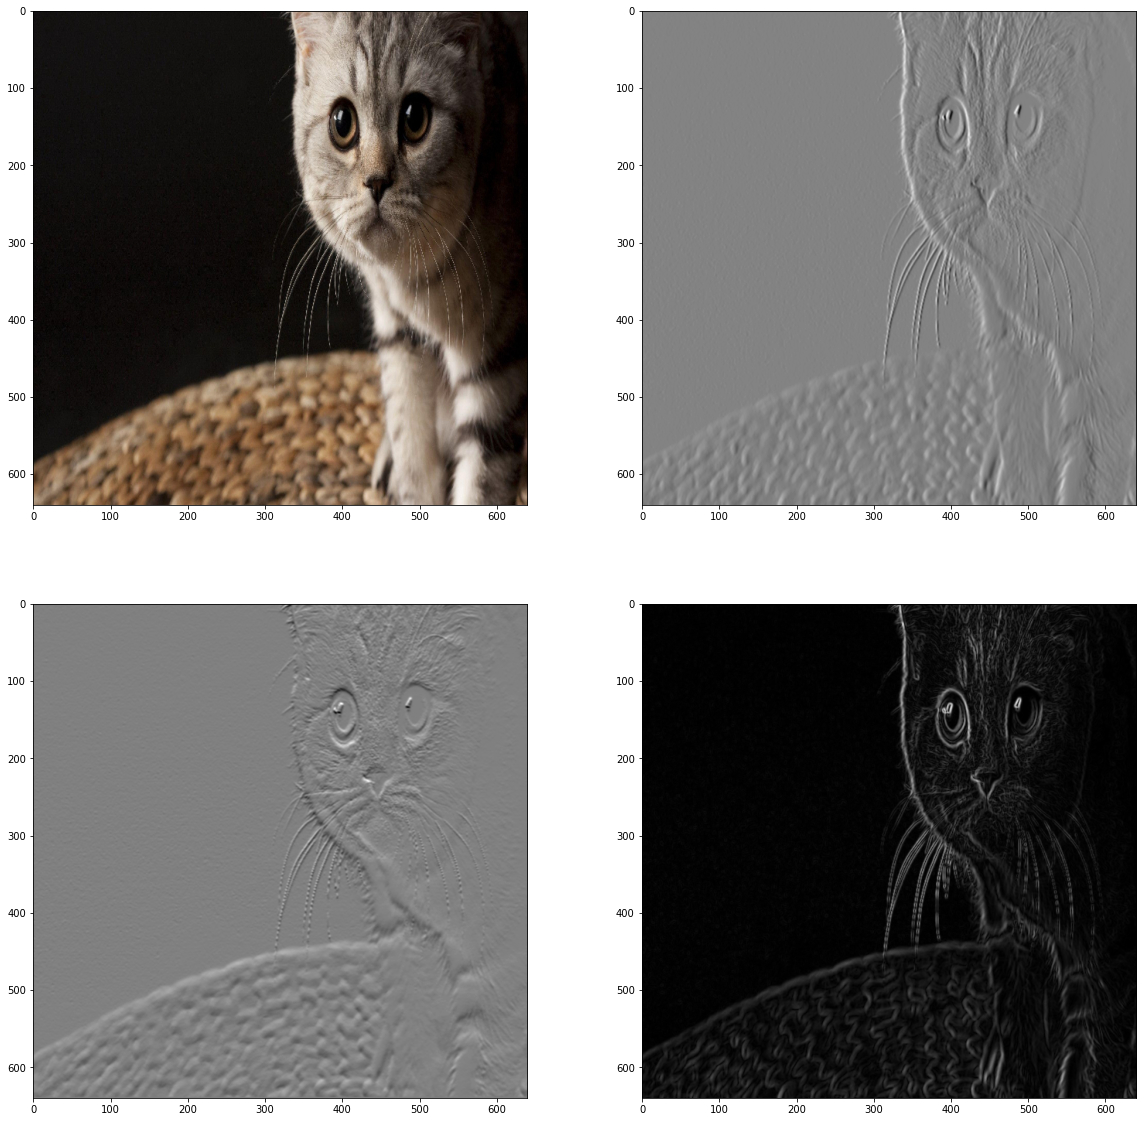

In [25]:
img = cv.imread("./ph/largeCat.jpg")
img = cv.resize(img, (640,640))
grayed = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sobelx = cv.Sobel(grayed,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(grayed,cv.CV_64F,0,1,ksize=5)
f = plt.figure(figsize=(20,20))
f.add_subplot(221)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
f.add_subplot(222)
plt.imshow(sobelx, cmap = 'gray')
f.add_subplot(223)
plt.imshow(sobely, cmap = 'gray')
f.add_subplot(224)
sobel = np.sqrt(sobelx*sobelx + sobely*sobely)
plt.imshow(sobel, cmap = 'gray')

#### Laplacian

На деле отличается, что под коробкой комбинирует производную по x и y, суммируя их и беря производную дважды (по собелю). Ну и еще вроде ядро другое  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


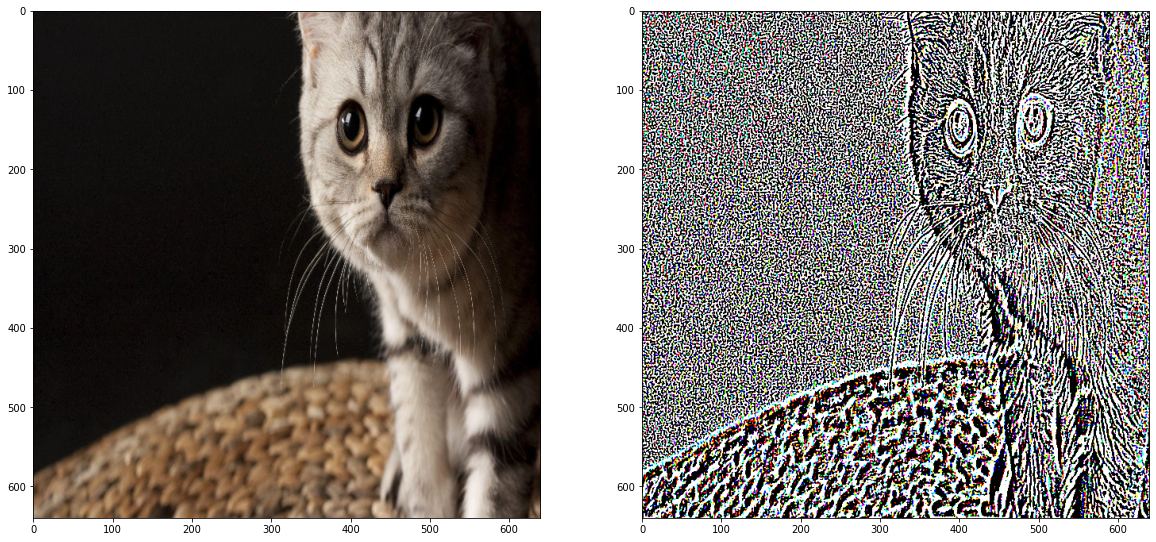

In [32]:
img = cv.imread("./ph/largeCat.jpg")
img = cv.resize(img, (640,640))
grayed = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
laplacian = cv.Laplacian(img,cv.CV_64F, ksize = 5)
f = plt.figure(figsize=(20,20))
f.add_subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
f.add_subplot(122)
plt.imshow(laplacian, cmap = 'gray')

Рисуется прямо таки очень странно, ну да ладно

#### Template Matching

Я не знаю, как мне не пришло это в голову на собесе, но да. Базовый поиск шаблона, это банальная задача сравнения шаблона и изображения, как  
в свертке. Берем шаблон в качестве ядра свертки и проходимся им по изображению. В точке, где найдется максимум (минимум) по метрике, присутствует наш шаблон.  
Базовый он, потому что это все еще +/- обычная свертка: скейлинг, вращения или любые другие трансформации шаблона/шаблона на фото скорее всего приведут  
к тому, что таким способом на фото мы его найти не сможем. Кстати метрик сравнения достаточно много, для примера возьму одну.

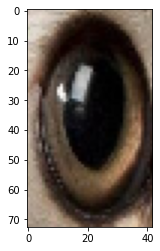

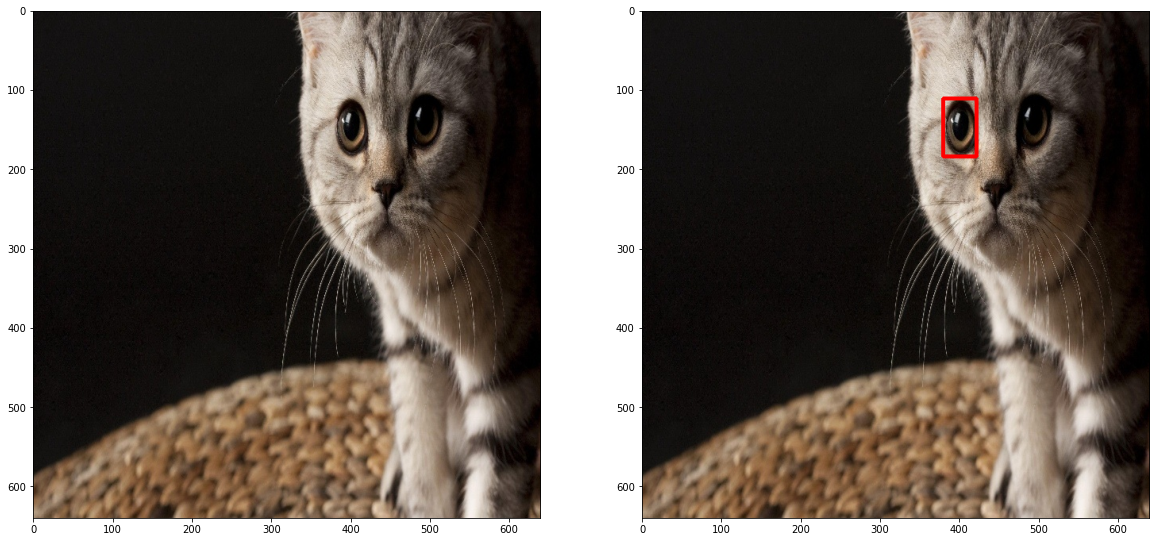

In [43]:
img = cv.imread("./ph/smallCat.jpg")
template = cv.imread("./ph/catsEye.png")
plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
f = plt.figure(figsize=(20,20))
f.add_subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

res = cv.matchTemplate(img, template, cv.TM_CCOEFF)
_, _, _, max_loc = cv.minMaxLoc(res)
topLeftPoint = max_loc
botRightPoint = (max_loc[0] + template.shape[1], max_loc[1] + template.shape[0])
cv.rectangle(img, topLeftPoint, botRightPoint, color = (0,0,255), thickness=3)

f.add_subplot(122)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
